# LSE Machine Learning: Practical Applications

## Module 6 Unit 2 IDE Activity (Practice)

### In this activity, you will have the opportunity to practice the application of ensemble learning on a data set in R.

As you complete this activity, you are required to read the text cells throughout the notebook and then run the code in the cells that follow. Be mindful of the syntax used to execute certain functionalities within R to produce a desired result. In completing this activity, you should gain the necessary practical skills to complete the IDE activity (assessment) that follows.

### Step 1: Load and install the relevant packages

In [1]:
# Load required packages.
library(tree)
library(MASS)
# randomForest and gbm packages are installed later on.

### Step 2: Load and prepare the data

To demonstrate the processes of bagging and random forests, the Boston housing data set is used, which you will recall from earlier modules. To prepare for the example, repeat the previous steps. These are not explained in detail, but you will be provided with observations as you move through the results.


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

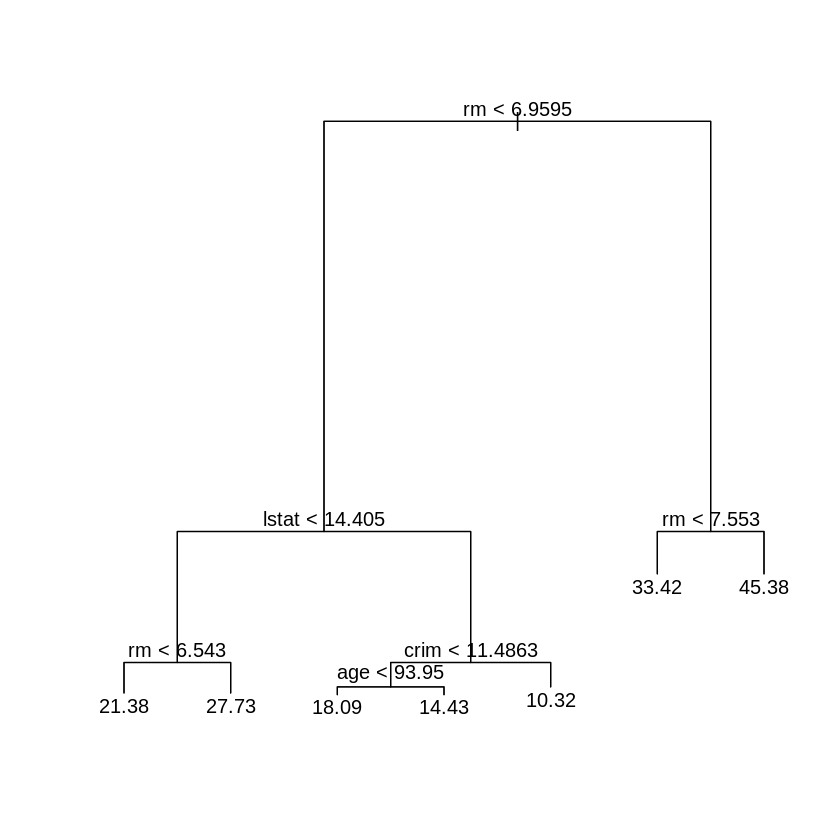

In [2]:
# Load the Boston data set from the MASS package.
library(MASS)
Boston <- Boston
set.seed(1)
train <- sample(1:nrow(Boston), nrow(Boston) / 2)
tree.boston <- tree(medv ~ ., Boston, subset = train)
summary(tree.boston)
plot(tree.boston)
text(tree.boston, pretty = 0)

The most complex tree is selected by cross validation. In the next code cell, a demonstration is given of how to prune the tree, should you wish to do so. Note, however, that the pruned tree should not be used in the steps that follow.

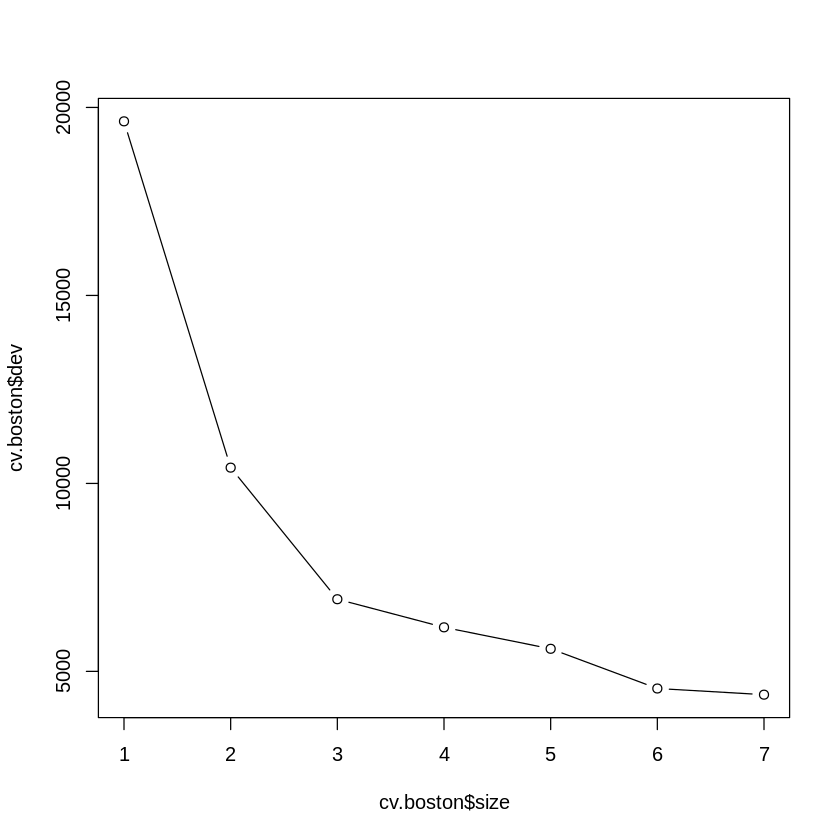

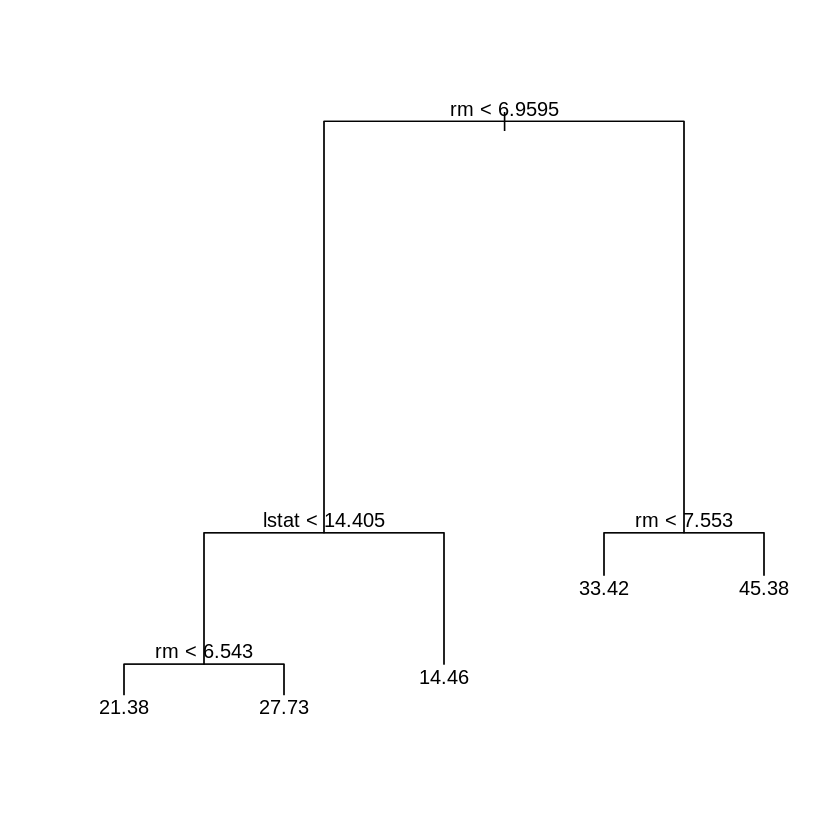

In [3]:
# Perform cross-validation.
cv.boston <- cv.tree(tree.boston)
plot(cv.boston$size, cv.boston$dev, type = "b")

# Demonstrate pruning using a manual parameter.
prune.boston <- prune.tree(tree.boston, best = 5)
plot(prune.boston)
text(prune.boston, pretty = 0)

In the next step, calculate a prediction using the unpruned tree that was suggested to be the optimal complexity, using the `yhat()` function. Once the prediction is calculated, plot the output with the `plot()` function to compare the predicted values to the true values.

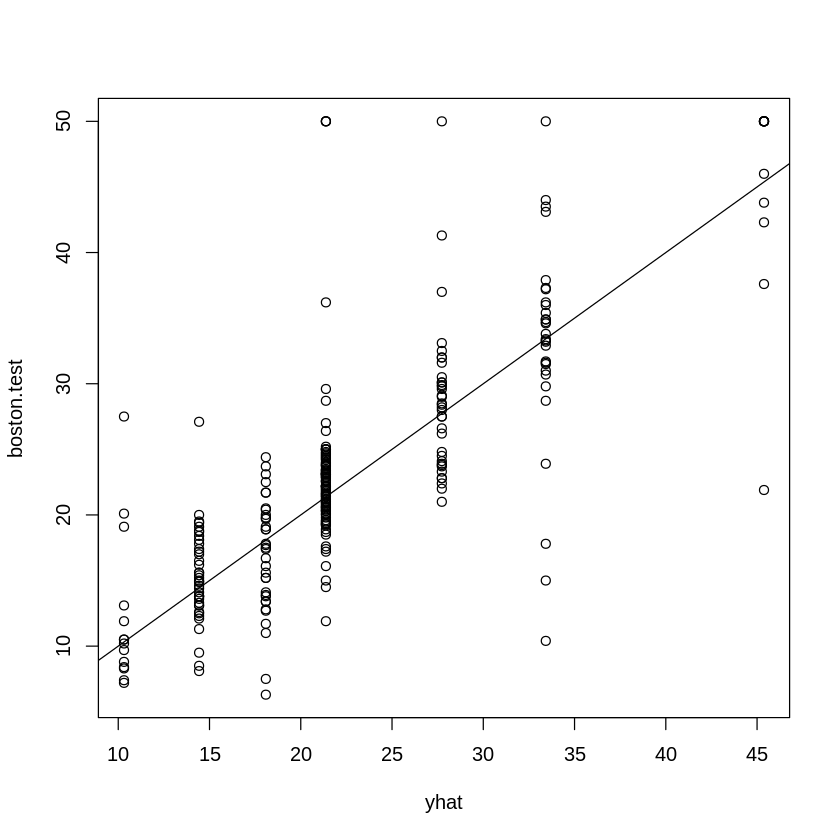

In [4]:
# Predict using the unpruned tree on the test data.
yhat <- predict(tree.boston, newdata = Boston[-train,])

# True values on the testing data.
boston.test <- Boston[-train, "medv"]
plot(yhat, boston.test)
abline(0, 1)

In the final step, compute the mean test error to use as the base for the steps that follow.

In [5]:
# Compute the test MSE
mean((yhat - boston.test) ^ 2)

[1] 35.28688

The MSE of this model is calculated to be 35.28.

### Step 3: Bagging and random forests

As a reminder, bagging refers to a special case of random forests where the parameters m and p are equal. In this case, we use mtry=13. In the next step, an example of bagging is demonstrated, starting with loading and installing the randomForest package. Once the package has been loaded and installed, the model is fitted onto the data set.

In [6]:
# Load the randomForest package, and fit the model.
library(randomForest)
set.seed(1)
bag.boston <- randomForest(medv~., 
                           data=Boston, 
                           subset=train, 
                           mtry=13, 
                           importance=TRUE)
bag.boston

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.




Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.39601
                    % Var explained: 85.17

In the next step, using the bagging method, the predicted values on the testing data are added, calculating the mean square of errors on the test data again.

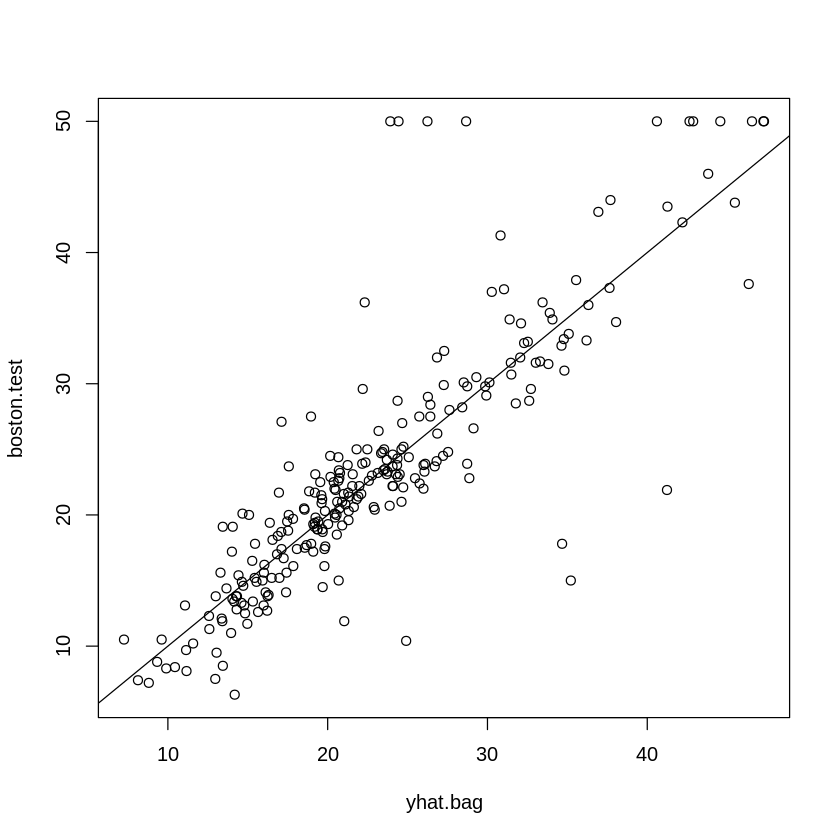

In [7]:
# Demonstrate bagging.
yhat.bag <-predict(bag.boston, newdata=Boston[-train,])
plot(yhat.bag, boston.test)
abline(0,1)

This plot gives us a comparison between the true value (boston.test) and the predicted value (yhat.bag). If the test data has been perfectly predicted, all points should be located on the line y = yhat.

In [8]:
# Compute the test mean square of errrors.
mean((yhat.bag-boston.test)^2)

[1] 23.59273

In this case, we observe a more drastic decrease in the MSE value, reduced from 35.28 to 23.59. To understand the importance of each variable within the data set more completely, the `importance` and `varImpPlot` methods are used.

,%IncMSE,IncNodePurity
crim,16.362497,812.299822
zn,3.672318,53.882834
indus,4.577286,105.897616
chas,-3.004551,9.830162
nox,21.197716,252.419316
rm,54.158175,12223.058424
age,16.878717,309.831460
dis,9.708368,246.684469
rad,1.642714,67.030656
tax,7.870121,131.888043


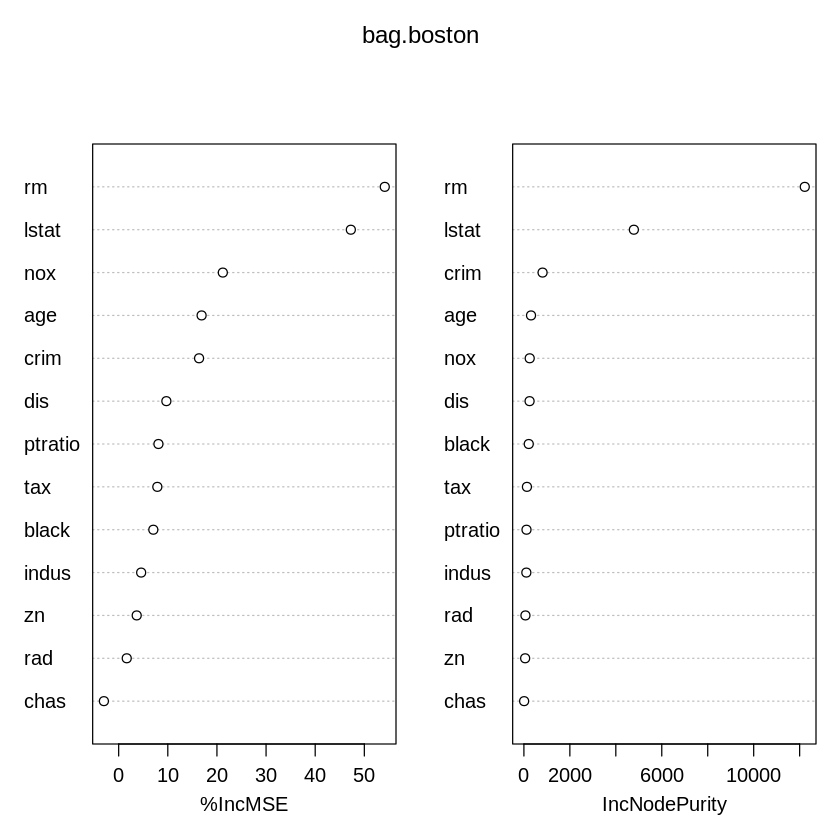

In [9]:
# Review the variable importance.
importance(bag.boston)
varImpPlot(bag.boston)

From the plot, we can observe that rm and lstat are the two most important variables.

Growing a random forest would be very similar. By default, the `randomForest()` package randomly selects m = p/3 variables when building a random forest of regression trees, and m = root p variables when building a random forest of classification trees. In this example, mtry = 6 is used. The output is not plotted, but the process is immediately followed by calculating the MSE value using the `mean()` function.

In [10]:
# Grow a random forest.
set.seed(1)
rf.boston <-randomForest(medv~., 
                         data=Boston, 
                         subset=train, 
                         mtry=6, 
                         importance=TRUE, 
                         n.tree = 5000)

# Predict.
yhat.rf <-predict(rf.boston, 
                  newdata=Boston[-train,])

# Calculate the test mean square of errors.
mean((yhat.rf-boston.test)^2)

[1] 19.62021

In this output, a decrease in the MSE value can be observed once again, reduced from 23.59 to 19.62.

### Step 4: Boosting
The process of boosting is demonstrated using the `gbm` package. Note that the options specified are similar to the previous models, but that the interaction depth must also be specified. In this case, it will be set to 4.

Loaded gbm 2.1.5



,var,rel.inf
,<fct>,<dbl>
rm,rm,43.9919329
lstat,lstat,33.1216941
crim,crim,4.2604167
dis,dis,4.0111090
nox,nox,3.4353017
black,black,2.8267554
age,age,2.6113938
ptratio,ptratio,2.5403035
tax,tax,1.4565654


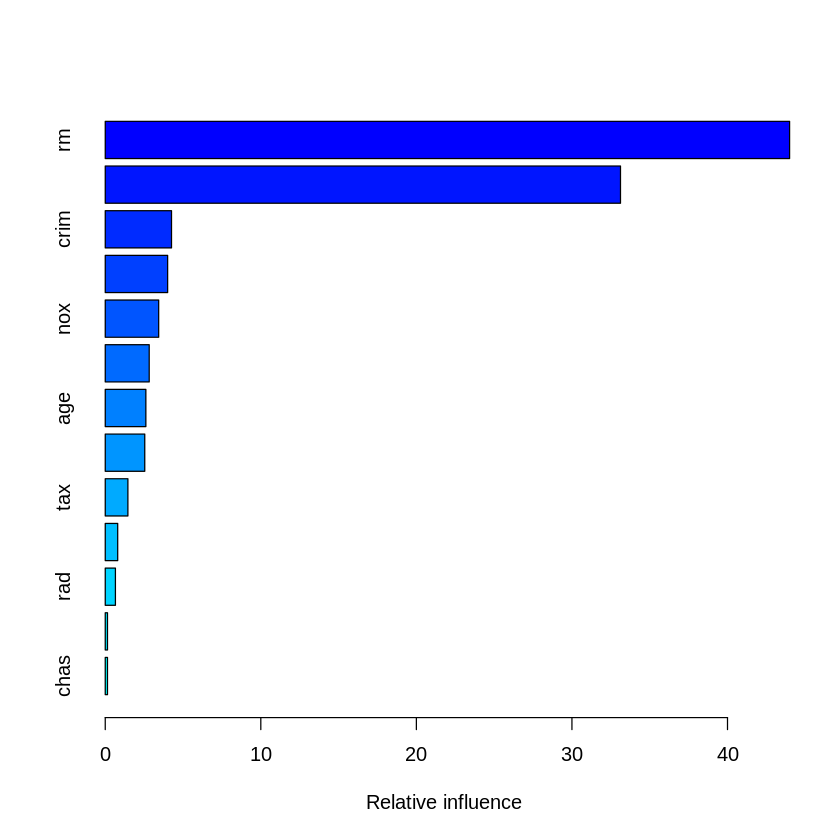

In [11]:
library(gbm)
set.seed (1)
boost.boston = gbm( medv ~ ., data = Boston[train , ], distribution = "gaussian",
  n.trees = 5000, interaction.depth = 4
)
summary(boost.boston)

Similar to previous observations, it appears that the variables rm and lstat are the most important. Following this, generate partial dependence plots for these two variables using the `par()` and `plot()` functions. These partial dependence plots display the marginal effect of the selected variables on the response, after integrating out other variables. 

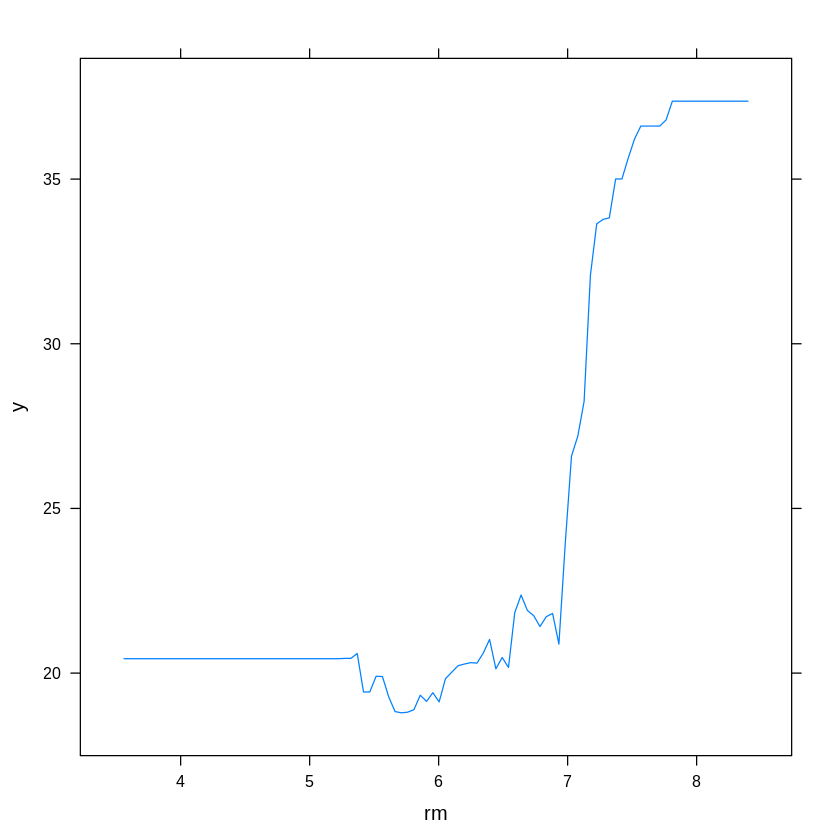

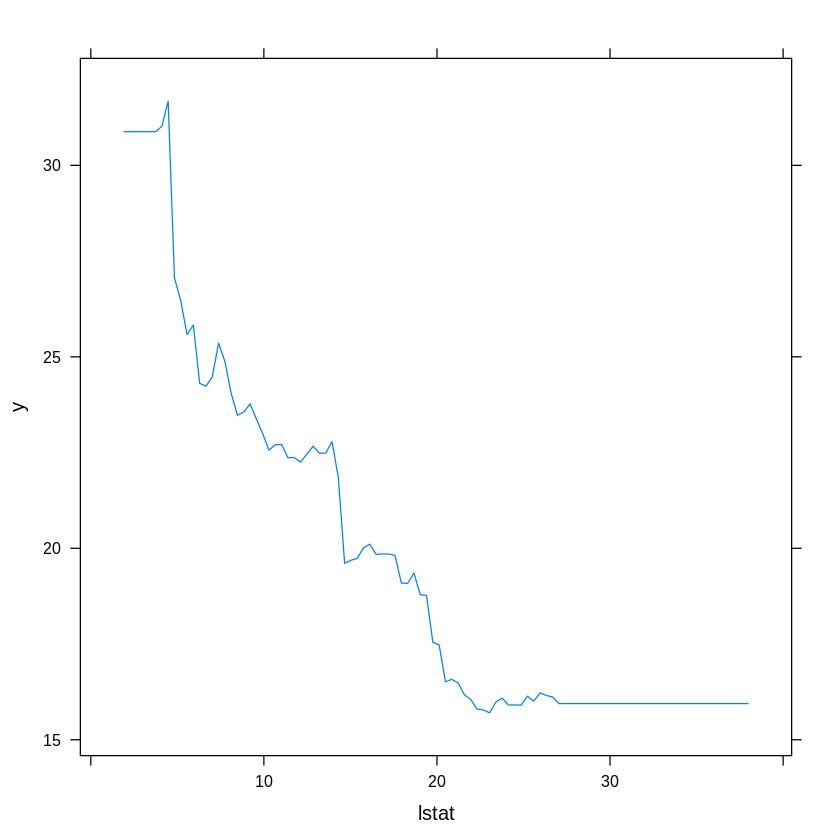

In [12]:
# Plot partial dependence plots for the two most important variables.
par(mfrow = c(1, 2))
plot(boost.boston, i="rm")
plot(boost.boston, i="lstat")

Finally, calculate the test MSE in order to review the effectiveness of the strategy in question.

In [13]:
yhat.boost = predict(boost.boston, newdata = Boston[-train, ], n.trees = 5000)
mean((yhat.boost - boston.test) ^ 2)

[1] 18.84709

As before, a marginal decrease in the MSE is observed. This demonstrates that the strategy is working.